In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from utils import get_file_data, get_config

In [2]:
file_path = '../output/rerun/'
files = sorted(os.listdir(file_path))
print(files)

['critical_prob=0.0&num_states=1&num_tasks=15&period=[10, 20, 25, 50, 75, 80, 100]&task_max_utilization=0.2.txt', 'critical_prob=0.1&num_states=1&num_tasks=15&period=[10, 20, 25, 50, 75, 80, 100]&task_max_utilization=0.2.txt', 'critical_prob=0.2&num_states=1&num_tasks=15&period=[10, 20, 25, 50, 75, 80, 100]&task_max_utilization=0.2.txt', 'critical_prob=0.3&num_states=1&num_tasks=15&period=[10, 20, 25, 50, 75, 80, 100]&task_max_utilization=0.2.txt', 'critical_prob=0.4&num_states=1&num_tasks=15&period=[10, 20, 25, 50, 75, 80, 100]&task_max_utilization=0.2.txt', 'critical_prob=0.5&num_states=1&num_tasks=15&period=[10, 20, 25, 50, 75, 80, 100]&task_max_utilization=0.2.txt', 'critical_prob=0.6&num_states=1&num_tasks=15&period=[10, 20, 25, 50, 75, 80, 100]&task_max_utilization=0.2.txt', 'critical_prob=0.7&num_states=1&num_tasks=15&period=[10, 20, 25, 50, 75, 80, 100]&task_max_utilization=0.2.txt', 'critical_prob=0.8&num_states=1&num_tasks=15&period=[10, 20, 25, 50, 75, 80, 100]&task_max_util

In [5]:
cfg = get_config('../cfg/rerun_exp_cfg.json')

criticality_prob_list = cfg['critical_prob_list']

orig = [0.0] * len(criticality_prob_list)
ours = [0.0] * len(criticality_prob_list)

In [6]:
for file in files :
    if not file.endswith('.txt') :
        continue
    _params = [p.split('=') for p in file[:-4].split('&')]
    params = {k: v for k, v in _params}
    data = get_file_data(file_path + file).split('\n')
    index = criticality_prob_list.index(float(params['critical_prob']))

    for line in data :
        if line == '' :
            continue
        core_orig, core_ours = [int(l) for l in line.split(',')]
        orig[index] += core_orig
        ours[index] += core_ours

In [7]:
num_task_sets = cfg['num_task_sets']

orig = [elmt / num_task_sets for elmt in orig]
ours = [elmt / num_task_sets for elmt in ours]

print(orig)
print(ours)

[4.4, 11.4, 13.6, 15.2, 15.0, 16.8, 16.6, 17.4, 16.6, 17.6, 10.2]
[4.4, 5.0, 6.0, 5.4, 6.4, 6.2, 7.0, 9.0, 8.4, 10.0, 10.2]


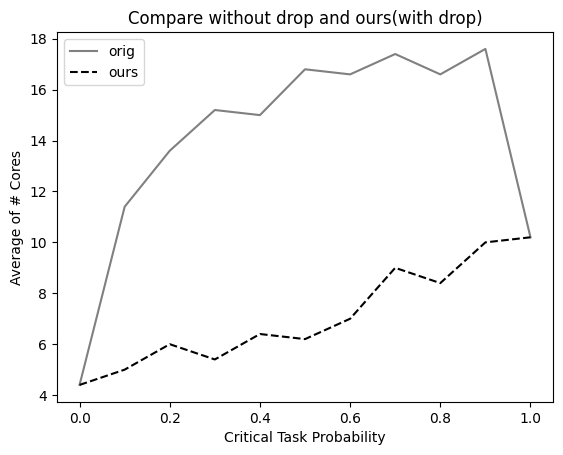

In [8]:
plt.plot(criticality_prob_list, orig, label='orig', color='gray')
plt.plot(criticality_prob_list, ours, label='ours', color='black', linestyle='dashed')

plt.title('Compare without drop and ours(with drop)')
plt.xlabel('Critical Task Probability')
plt.ylabel('Average of # Cores')
plt.legend()
plt.show()